In [1]:
from sklearn.svm import SVC
x=SVC()

In [2]:
x

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Agenda
- Decision Tree
- Types of Decision Trees
- Algorithems of Decision Trees
- Terminology of Decision Tree
   

## Decision Tree
- It is a flowchart representation
- A tree can be formed with the no of decision's


## Types of  Decision Tree
- Decision Tree Regressor
    - Target data is continuous
- Decision Tree Classifier
    - Target data is discrete or categorical

## Algorithems of Decision Tree
- CART Algorithem(Classification and Regression )
    - Gini Index
        - It varies from 0(Pure) to 1(impure)
        - To calculating gini impurity
            - Gini(A)=Gini(D)-Gini(A)(D)
        
- Id3 Algorithem(Iterative dechotomiser Algorithem)
    - Entropy 
        - entropy also varies from 0 to 1
        - which measures impurity or randomness in data
            - H(s)=-p(yes)log2p(yes)-p(no)log2p(n0)
               - s=total sample space
    - Information Gain
        - high IG will gives you a best root node
        - measures the reduction in entropy
            - IG=H(s)-weighted avg*entropy of child
          

In [4]:
from sklearn import tree
m=tree.DecisionTreeClassifier()
m

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
# 1.Loading the data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Machine-Learning-Using-Python-EB6/master/Day-06(10-10-2020)/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [21]:
df.shape

(16, 4)

In [22]:
## 2.data Wrangling
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [23]:
## 3. Defining input and ouput
x=df.drop(["salary_more_then_100k"],axis="columns")
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [35]:
y=df[["salary_more_then_100k"]]
y

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


#### 4. Pipeling process
- The input are object data type, we have to convert them into int/float

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [26]:
x["company"]=le_company.fit_transform(x["company"])
x["job"]=le_job.fit_transform(x["job"])
x["degree"]=le_degree.fit_transform(x["degree"])

In [29]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [38]:
##5.Calling the model
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='entropy')
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
import numpy as np
np.ndim(x)

2

In [40]:
np.ndim(y)


2

In [41]:
dtc.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
pred=dtc.predict(x)
pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
accuracy_score(y,pred)

1.0

In [45]:
confusion_matrix(y,pred)

array([[ 6,  0],
       [ 0, 10]], dtype=int64)

In [46]:
dtc.predict([[2,2,0]]) 

array([0], dtype=int64)

[Text(152.1818181818182, 199.32, 'X[0] <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(91.30909090909091, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(60.872727272727275, 126.83999999999999, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(30.436363636363637, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(91.30909090909091, 90.6, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(121.74545454545455, 126.83999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(213.05454545454546, 163.07999999999998, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(182.61818181818182, 126.83999999999999, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(243.4909090909091, 126.83999999999999, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(213.05454545454546, 90.6, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(273.92727272727274, 90.6, 'X[1] <= 1.5\nentropy 

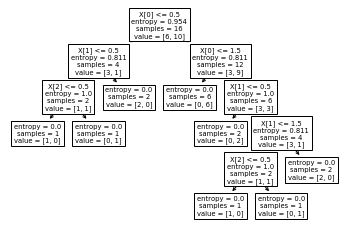

In [49]:
tree.plot_tree(dtc)

In [50]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [52]:
## graphviz- downlaod the (dot.)file  display the tree in u r system
## pydotplus- converts to image

In [55]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

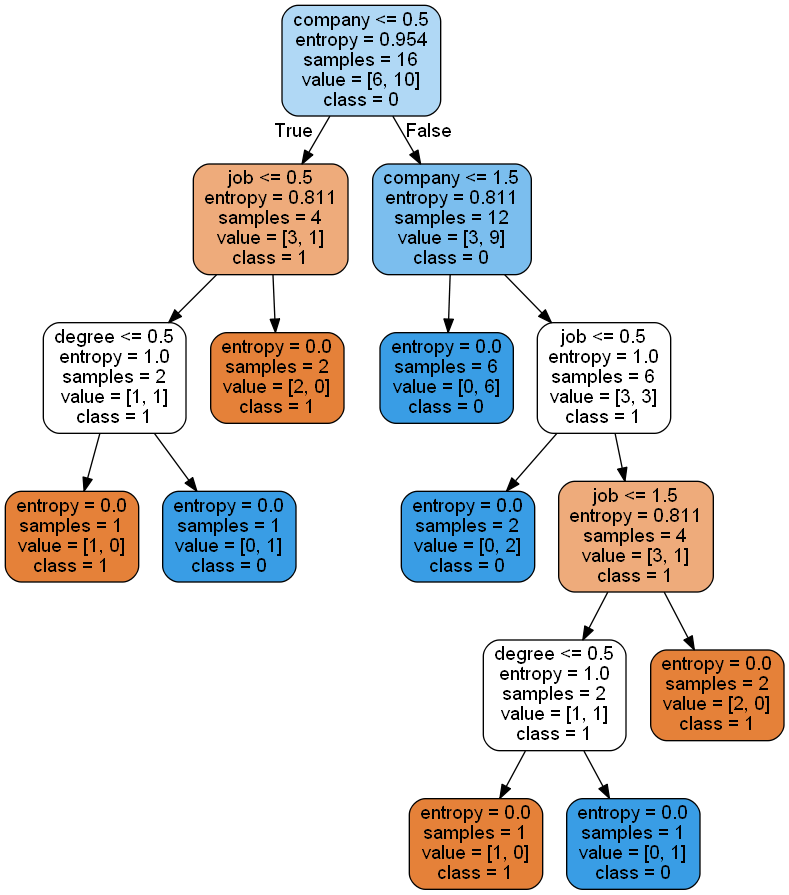

In [59]:
data=StringIO()
export_graphviz(dtc,out_file=data,filled=True,
                rounded=True,feature_names=x.columns,class_names=["1","0"])
g=pydotplus.graph_from_dot_data(data.getvalue())
Image(g.create_png())

In [60]:
## U Take a iris data set  and apply  Decision Tree Classifier
## choose the root node on the basis of entropy
## Choose random_stae as "best"
## find out the score
## predict the ouput
## visuvalise the tree